In [25]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np




In [26]:
# Load the dataset
# data = pd.read_csv('./Brent_crude_oil.csv')
data = pd.read_csv('../Model is used in base paper other than compare one/2. preprocessed WTI dataset/Crude Oil WTI Futures daily.csv')



In [27]:
# Convert 'Date' column to datetime and sort the dataset
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%y')
data = data.sort_values('Date')


ValueError: unconverted data remains when parsing with format "%d-%m-%y": "24", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [4]:
# Use only the 'Close' prices for prediction
close_prices = data['Close'].values.reshape(-1, 1)



In [5]:
# Normalize the data
scaler = StandardScaler()
close_prices_scaled = scaler.fit_transform(close_prices)



In [6]:
# Create X (previous day's price) and y (current day's price)
X = close_prices_scaled[:-1]  # All but the last value
y = close_prices_scaled[1:]   # All but the first value



In [7]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
# Initialize and train the SVR model
model = SVR(kernel='rbf')
model.fit(X_train, y_train.ravel())



SVR()

In [9]:
# Make predictions
y_pred = model.predict(X_test)



In [10]:
# Inverse transform the predictions to get the original scale
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))



In [11]:

# Evaluate the model
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

rmse=  root_mean_squared_error(y_test,y_pred)
mape=  mean_absolute_percentage_error(y_test,y_pred)
mae=  mean_absolute_error(y_test,y_pred)

# Print the evaluation metrics
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"Mean Absolute Error: {mae}")




Root Mean Squared Error: 0.06833508278839201
Mean Absolute Percentage Error: 0.31152445494913833
Mean Absolute Error: 0.05114093994289265


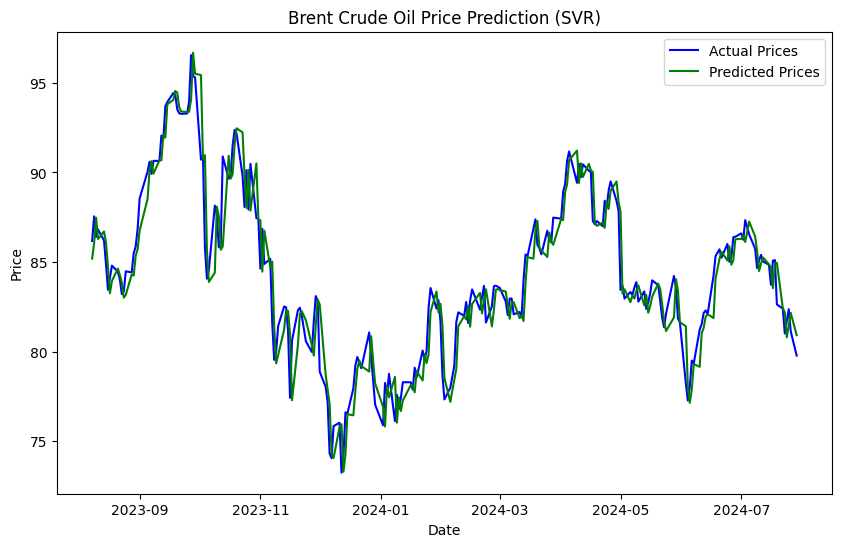

In [12]:
# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Date'].iloc[-len(y_test_inv):], y_test_inv, color='blue', label='Actual Prices')
plt.plot(data['Date'].iloc[-len(y_pred_inv):], y_pred_inv, color='green', label='Predicted Prices')

# plt.plot(data['Date'].iloc[-len(y_test):], y_test, color='blue', label='Actual Prices')
# plt.plot(data['Date'].iloc[-len(y_pred):], y_pred, color='green', label='Predicted Prices')
plt.title('WTI Crude Oil Price Prediction (SVR)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

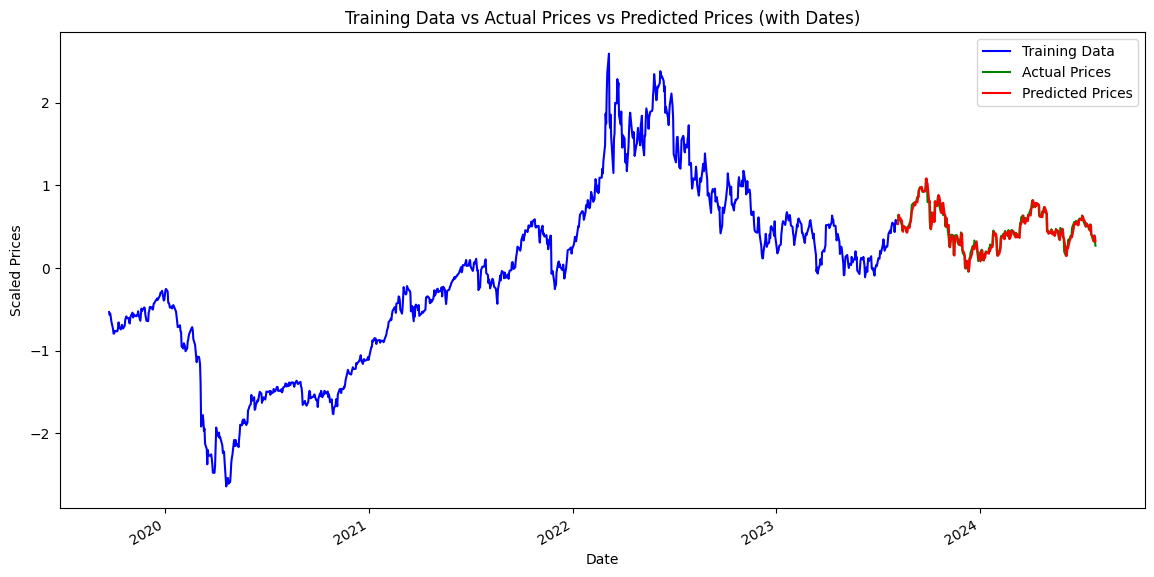

In [13]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt

# Plot the actual and predicted prices with dates on the x-axis
plt.figure(figsize=(14, 7))

# For training data, we will use a range of indices as we don't have specific dates for training
plt.plot(data['Date'].iloc[:len(X_train)], y_train, label='Training Data', color='blue')

# Plot actual test data using Date column
plt.plot(data['Date'].iloc[len(X_train):len(X_train) + len(y_test)], y_test, label='Actual Prices', color='green')

# Plot predicted test data using Date column
plt.plot(data['Date'].iloc[len(X_train):len(X_train) + len(y_pred)], y_pred, label='Predicted Prices', color='red')

# Format the x-axis to show year-wise dates (optional: rotate for better readability)
plt.gcf().autofmt_xdate()

plt.title("Training Data vs Actual Prices vs Predicted Prices (with Dates)")
plt.xlabel("Date")
plt.ylabel("Scaled Prices")
plt.legend()
plt.show()




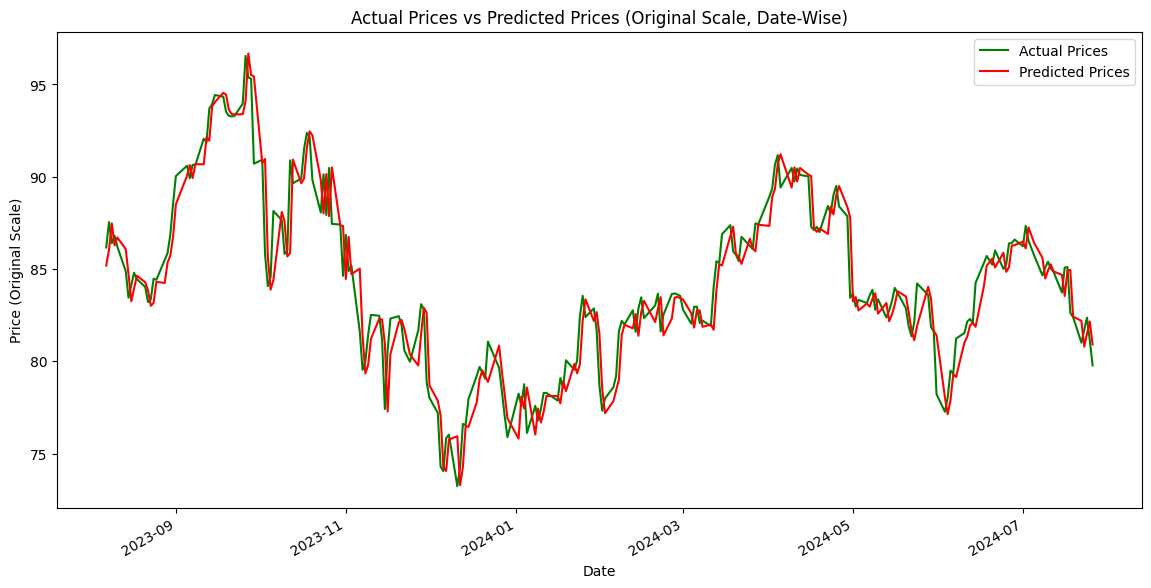

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\verma\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\verma\AppData\Local\Programs\Python\Python311\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\verma\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\verma\AppData\Local\Programs\Python\Python311\Lib\asyncio\selector_even

In [14]:
# Plot inverse transformed (original) prices for test data (actual vs predicted)
plt.figure(figsize=(14, 7))

# Plot actual prices (inverse transformed) with Date column
plt.plot(data['Date'].iloc[len(X_train):len(X_train) + len(y_test_inv)], y_test_inv, label='Actual Prices', color='green')

# Plot predicted prices (inverse transformed) with Date column
plt.plot(data['Date'].iloc[len(X_train):len(X_train) + len(y_pred_inv)], y_pred_inv, label='Predicted Prices', color='red')

# Format the x-axis to show year-wise dates (optional: rotate for better readability)
plt.gcf().autofmt_xdate()

# Add title and labels
plt.title("Actual Prices vs Predicted Prices (Original Scale, Date-Wise)")
plt.xlabel("Date")
plt.ylabel("Price (Original Scale)")
plt.legend()

# Show the plot
plt.show()
